In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset, load_rebalanced_dataset
from functions.model_running import get_run_number, run_model
from models.xception import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'xception_dealing_with_imbalance_2_oversampling_only'

In [3]:
BATCH_SIZE = 64
unbalanced_dataset = load_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)
balanced_train_dataset = load_rebalanced_dataset(WIDTH, HEIGHT, DATA_DIR, 'training', BATCH_SIZE)

Found 8015 files belonging to 7 classes.
Found 8015 files belonging to 7 classes.


In [4]:
all_labels = []

for images, labels in balanced_train_dataset.take(100):
    all_labels.append(labels.numpy())

all_labels = np.concatenate(all_labels)
class_counts = np.sum(all_labels, axis=0)

In [5]:
mean_class_count = np.mean(class_counts)
resampled_steps_per_epoch = np.ceil(2.0 * mean_class_count / BATCH_SIZE)

In [6]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 3.5625 - categorical cross entropy: 3.5625 - mean squared error: 0.1169 - accuracy: 0.6239 - auc: 0.5228 - prc: 0.1468

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_1\assets


29/29 [==============================] - 101s 1s/step - loss: 3.5625 - categorical cross entropy: 3.5625 - mean squared error: 0.1169 - accuracy: 0.6239 - auc: 0.5228 - prc: 0.1468 - val_loss: 6.5360 - val_categorical cross entropy: 6.5360 - val_mean squared error: 0.0941 - val_accuracy: 0.6705 - val_auc: 0.5000 - val_prc: 0.1429 - lr: 0.0010
Epoch 2/100
29/29 [==============================] - ETA: 0s - loss: 1.4216 - categorical cross entropy: 1.4216 - mean squared error: 0.0924 - accuracy: 0.6681 - auc: 0.5303 - prc: 0.1507

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_2\assets


29/29 [==============================] - 29s 1s/step - loss: 1.4216 - categorical cross entropy: 1.4216 - mean squared error: 0.0924 - accuracy: 0.6681 - auc: 0.5303 - prc: 0.1507 - val_loss: 1.2496 - val_categorical cross entropy: 1.2496 - val_mean squared error: 0.0776 - val_accuracy: 0.6705 - val_auc: 0.5643 - val_prc: 0.1630 - lr: 0.0010
Epoch 3/100
29/29 [==============================] - 13s 438ms/step - loss: 1.0367 - categorical cross entropy: 1.0367 - mean squared error: 0.0670 - accuracy: 0.6703 - auc: 0.6879 - prc: 0.2124 - val_loss: 1.8315 - val_categorical cross entropy: 1.8315 - val_mean squared error: 0.0790 - val_accuracy: 0.6705 - val_auc: 0.6598 - val_prc: 0.2194 - lr: 0.0010
Epoch 4/100
29/29 [==============================] - 13s 449ms/step - loss: 0.9073 - categorical cross entropy: 0.9073 - mean squared error: 0.0585 - accuracy: 0.6961 - auc: 0.7684 - prc: 0.2366 - val_loss: 1.7104 - val_categorical cross entropy: 1.7104 - val_mean squared error: 0.0740 - val_accu

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_5\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_5\assets


29/29 [==============================] - 28s 1s/step - loss: 0.9574 - categorical cross entropy: 0.9574 - mean squared error: 0.0622 - accuracy: 0.6514 - auc: 0.7759 - prc: 0.2525 - val_loss: 1.1153 - val_categorical cross entropy: 1.1153 - val_mean squared error: 0.0641 - val_accuracy: 0.6705 - val_auc: 0.7578 - val_prc: 0.2534 - lr: 0.0010
Epoch 6/100
29/29 [==============================] - ETA: 0s - loss: 0.8702 - categorical cross entropy: 0.8702 - mean squared error: 0.0573 - accuracy: 0.6837 - auc: 0.8025 - prc: 0.2444

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_6\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_6\assets


29/29 [==============================] - 29s 998ms/step - loss: 0.8702 - categorical cross entropy: 0.8702 - mean squared error: 0.0573 - accuracy: 0.6837 - auc: 0.8025 - prc: 0.2444 - val_loss: 0.9171 - val_categorical cross entropy: 0.9171 - val_mean squared error: 0.0591 - val_accuracy: 0.6705 - val_auc: 0.7866 - val_prc: 0.2593 - lr: 0.0010
Epoch 7/100
29/29 [==============================] - ETA: 0s - loss: 0.8581 - categorical cross entropy: 0.8581 - mean squared error: 0.0569 - accuracy: 0.6756 - auc: 0.8059 - prc: 0.2653

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_7\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_7\assets


29/29 [==============================] - 27s 964ms/step - loss: 0.8581 - categorical cross entropy: 0.8581 - mean squared error: 0.0569 - accuracy: 0.6756 - auc: 0.8059 - prc: 0.2653 - val_loss: 0.8556 - val_categorical cross entropy: 0.8556 - val_mean squared error: 0.0561 - val_accuracy: 0.6705 - val_auc: 0.7926 - val_prc: 0.2689 - lr: 0.0010
Epoch 8/100
29/29 [==============================] - 10s 351ms/step - loss: 0.8476 - categorical cross entropy: 0.8476 - mean squared error: 0.0560 - accuracy: 0.7015 - auc: 0.7860 - prc: 0.2557 - val_loss: 0.8815 - val_categorical cross entropy: 0.8815 - val_mean squared error: 0.0561 - val_accuracy: 0.6975 - val_auc: 0.7990 - val_prc: 0.2592 - lr: 0.0010
Epoch 9/100
29/29 [==============================] - 12s 428ms/step - loss: 0.8168 - categorical cross entropy: 0.8168 - mean squared error: 0.0546 - accuracy: 0.7101 - auc: 0.8325 - prc: 0.2831 - val_loss: 0.9084 - val_categorical cross entropy: 0.9084 - val_mean squared error: 0.0556 - val_a

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_11\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_11\assets


29/29 [==============================] - 34s 1s/step - loss: 0.7984 - categorical cross entropy: 0.7984 - mean squared error: 0.0540 - accuracy: 0.6967 - auc: 0.8696 - prc: 0.3337 - val_loss: 0.8205 - val_categorical cross entropy: 0.8205 - val_mean squared error: 0.0554 - val_accuracy: 0.7005 - val_auc: 0.8684 - val_prc: 0.3593 - lr: 0.0010
Epoch 12/100
29/29 [==============================] - ETA: 0s - loss: 0.7590 - categorical cross entropy: 0.7590 - mean squared error: 0.0529 - accuracy: 0.7085 - auc: 0.8892 - prc: 0.3948

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_12\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_12\assets


29/29 [==============================] - 26s 909ms/step - loss: 0.7590 - categorical cross entropy: 0.7590 - mean squared error: 0.0529 - accuracy: 0.7085 - auc: 0.8892 - prc: 0.3948 - val_loss: 0.7623 - val_categorical cross entropy: 0.7623 - val_mean squared error: 0.0529 - val_accuracy: 0.7025 - val_auc: 0.8890 - val_prc: 0.4118 - lr: 0.0010
Epoch 13/100
29/29 [==============================] - ETA: 0s - loss: 0.7465 - categorical cross entropy: 0.7465 - mean squared error: 0.0514 - accuracy: 0.7306 - auc: 0.8770 - prc: 0.3860

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_13\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_13\assets


29/29 [==============================] - 26s 894ms/step - loss: 0.7465 - categorical cross entropy: 0.7465 - mean squared error: 0.0514 - accuracy: 0.7306 - auc: 0.8770 - prc: 0.3860 - val_loss: 0.7510 - val_categorical cross entropy: 0.7510 - val_mean squared error: 0.0501 - val_accuracy: 0.7325 - val_auc: 0.8783 - val_prc: 0.4570 - lr: 0.0010
Epoch 14/100
29/29 [==============================] - 10s 334ms/step - loss: 0.7466 - categorical cross entropy: 0.7466 - mean squared error: 0.0516 - accuracy: 0.7338 - auc: 0.8764 - prc: 0.4273 - val_loss: 0.7604 - val_categorical cross entropy: 0.7604 - val_mean squared error: 0.0482 - val_accuracy: 0.7495 - val_auc: 0.8855 - val_prc: 0.4749 - lr: 0.0010
Epoch 15/100
29/29 [==============================] - ETA: 0s - loss: 0.6978 - categorical cross entropy: 0.6978 - mean squared error: 0.0488 - accuracy: 0.7462 - auc: 0.8965 - prc: 0.4611

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_15\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_15\assets


29/29 [==============================] - 27s 950ms/step - loss: 0.6978 - categorical cross entropy: 0.6978 - mean squared error: 0.0488 - accuracy: 0.7462 - auc: 0.8965 - prc: 0.4611 - val_loss: 0.7131 - val_categorical cross entropy: 0.7131 - val_mean squared error: 0.0485 - val_accuracy: 0.7510 - val_auc: 0.8934 - val_prc: 0.5062 - lr: 0.0010
Epoch 16/100
29/29 [==============================] - 10s 332ms/step - loss: 0.6950 - categorical cross entropy: 0.6950 - mean squared error: 0.0479 - accuracy: 0.7538 - auc: 0.9033 - prc: 0.4616 - val_loss: 0.7852 - val_categorical cross entropy: 0.7852 - val_mean squared error: 0.0514 - val_accuracy: 0.7245 - val_auc: 0.8960 - val_prc: 0.4470 - lr: 0.0010
Epoch 17/100
29/29 [==============================] - 10s 336ms/step - loss: 0.7119 - categorical cross entropy: 0.7119 - mean squared error: 0.0496 - accuracy: 0.7403 - auc: 0.9054 - prc: 0.4676 - val_loss: 1.2204 - val_categorical cross entropy: 1.2204 - val_mean squared error: 0.0491 - val

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_24\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_24\assets


29/29 [==============================] - 32s 1s/step - loss: 0.6131 - categorical cross entropy: 0.6131 - mean squared error: 0.0432 - accuracy: 0.7856 - auc: 0.9296 - prc: 0.5591 - val_loss: 0.6219 - val_categorical cross entropy: 0.6219 - val_mean squared error: 0.0444 - val_accuracy: 0.7820 - val_auc: 0.9279 - val_prc: 0.5884 - lr: 0.0010
Epoch 25/100
29/29 [==============================] - 10s 339ms/step - loss: 0.6028 - categorical cross entropy: 0.6028 - mean squared error: 0.0428 - accuracy: 0.7823 - auc: 0.9283 - prc: 0.6184 - val_loss: 0.7756 - val_categorical cross entropy: 0.7756 - val_mean squared error: 0.0435 - val_accuracy: 0.7845 - val_auc: 0.9125 - val_prc: 0.5743 - lr: 0.0010
Epoch 26/100
29/29 [==============================] - 10s 336ms/step - loss: 0.5991 - categorical cross entropy: 0.5991 - mean squared error: 0.0423 - accuracy: 0.7845 - auc: 0.9284 - prc: 0.6168 - val_loss: 0.6846 - val_categorical cross entropy: 0.6846 - val_mean squared error: 0.0447 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_31\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_31\assets


29/29 [==============================] - 35s 1s/step - loss: 0.5431 - categorical cross entropy: 0.5431 - mean squared error: 0.0391 - accuracy: 0.8050 - auc: 0.9460 - prc: 0.6713 - val_loss: 0.6196 - val_categorical cross entropy: 0.6196 - val_mean squared error: 0.0425 - val_accuracy: 0.7890 - val_auc: 0.9146 - val_prc: 0.6218 - lr: 0.0010
Epoch 32/100
29/29 [==============================] - 10s 333ms/step - loss: 0.5639 - categorical cross entropy: 0.5639 - mean squared error: 0.0408 - accuracy: 0.7958 - auc: 0.9484 - prc: 0.6645 - val_loss: 0.7132 - val_categorical cross entropy: 0.7132 - val_mean squared error: 0.0466 - val_accuracy: 0.7830 - val_auc: 0.9227 - val_prc: 0.6377 - lr: 0.0010
Epoch 33/100
29/29 [==============================] - 10s 332ms/step - loss: 0.5217 - categorical cross entropy: 0.5217 - mean squared error: 0.0376 - accuracy: 0.8136 - auc: 0.9492 - prc: 0.6452 - val_loss: 0.7504 - val_categorical cross entropy: 0.7504 - val_mean squared error: 0.0484 - val_ac

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_34\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_34\assets


29/29 [==============================] - 28s 995ms/step - loss: 0.5337 - categorical cross entropy: 0.5337 - mean squared error: 0.0376 - accuracy: 0.8152 - auc: 0.9512 - prc: 0.6742 - val_loss: 0.6116 - val_categorical cross entropy: 0.6116 - val_mean squared error: 0.0438 - val_accuracy: 0.7785 - val_auc: 0.9355 - val_prc: 0.6294 - lr: 0.0010
Epoch 35/100
29/29 [==============================] - 10s 327ms/step - loss: 0.5321 - categorical cross entropy: 0.5321 - mean squared error: 0.0380 - accuracy: 0.8129 - auc: 0.9499 - prc: 0.6989 - val_loss: 0.6488 - val_categorical cross entropy: 0.6488 - val_mean squared error: 0.0455 - val_accuracy: 0.7810 - val_auc: 0.9339 - val_prc: 0.6506 - lr: 0.0010
Epoch 36/100
29/29 [==============================] - 9s 333ms/step - loss: 0.5403 - categorical cross entropy: 0.5403 - mean squared error: 0.0390 - accuracy: 0.8107 - auc: 0.9522 - prc: 0.7040 - val_loss: 0.7011 - val_categorical cross entropy: 0.7011 - val_mean squared error: 0.0479 - val_

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_45\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_45\assets


29/29 [==============================] - 33s 1s/step - loss: 0.4487 - categorical cross entropy: 0.4487 - mean squared error: 0.0333 - accuracy: 0.8341 - auc: 0.9603 - prc: 0.7367 - val_loss: 0.6090 - val_categorical cross entropy: 0.6090 - val_mean squared error: 0.0419 - val_accuracy: 0.7965 - val_auc: 0.9411 - val_prc: 0.6799 - lr: 9.5000e-04
Epoch 46/100
29/29 [==============================] - 10s 341ms/step - loss: 0.4468 - categorical cross entropy: 0.4468 - mean squared error: 0.0326 - accuracy: 0.8314 - auc: 0.9578 - prc: 0.7492 - val_loss: 0.7699 - val_categorical cross entropy: 0.7699 - val_mean squared error: 0.0547 - val_accuracy: 0.7370 - val_auc: 0.9342 - val_prc: 0.6679 - lr: 9.5000e-04
Epoch 47/100
29/29 [==============================] - 9s 317ms/step - loss: 0.4889 - categorical cross entropy: 0.4889 - mean squared error: 0.0342 - accuracy: 0.8297 - auc: 0.9530 - prc: 0.7554 - val_loss: 0.7354 - val_categorical cross entropy: 0.7354 - val_mean squared error: 0.0447 -

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_51\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_51\assets


29/29 [==============================] - 37s 1s/step - loss: 0.4402 - categorical cross entropy: 0.4402 - mean squared error: 0.0322 - accuracy: 0.8508 - auc: 0.9571 - prc: 0.7660 - val_loss: 0.5971 - val_categorical cross entropy: 0.5971 - val_mean squared error: 0.0417 - val_accuracy: 0.7965 - val_auc: 0.9360 - val_prc: 0.7138 - lr: 9.5000e-04
Epoch 52/100
29/29 [==============================] - ETA: 0s - loss: 0.4152 - categorical cross entropy: 0.4152 - mean squared error: 0.0308 - accuracy: 0.8513 - auc: 0.9661 - prc: 0.7931

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_52\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_52\assets


29/29 [==============================] - 29s 1s/step - loss: 0.4152 - categorical cross entropy: 0.4152 - mean squared error: 0.0308 - accuracy: 0.8513 - auc: 0.9661 - prc: 0.7931 - val_loss: 0.5906 - val_categorical cross entropy: 0.5906 - val_mean squared error: 0.0413 - val_accuracy: 0.7950 - val_auc: 0.9445 - val_prc: 0.7058 - lr: 9.5000e-04
Epoch 53/100
29/29 [==============================] - 10s 343ms/step - loss: 0.3840 - categorical cross entropy: 0.3840 - mean squared error: 0.0279 - accuracy: 0.8658 - auc: 0.9724 - prc: 0.8339 - val_loss: 0.6226 - val_categorical cross entropy: 0.6226 - val_mean squared error: 0.0439 - val_accuracy: 0.7905 - val_auc: 0.9437 - val_prc: 0.6896 - lr: 9.5000e-04
Epoch 54/100
29/29 [==============================] - ETA: 0s - loss: 0.4401 - categorical cross entropy: 0.4401 - mean squared error: 0.0315 - accuracy: 0.8497 - auc: 0.9594 - prc: 0.7563

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_54\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\xception_dealing_with_imbalance_2_oversampling_only_15_54\assets


29/29 [==============================] - 33s 1s/step - loss: 0.4401 - categorical cross entropy: 0.4401 - mean squared error: 0.0315 - accuracy: 0.8497 - auc: 0.9594 - prc: 0.7563 - val_loss: 0.5291 - val_categorical cross entropy: 0.5291 - val_mean squared error: 0.0373 - val_accuracy: 0.8235 - val_auc: 0.9452 - val_prc: 0.7198 - lr: 9.5000e-04
Epoch 55/100
29/29 [==============================] - 10s 336ms/step - loss: 0.4274 - categorical cross entropy: 0.4274 - mean squared error: 0.0312 - accuracy: 0.8443 - auc: 0.9654 - prc: 0.7889 - val_loss: 0.6203 - val_categorical cross entropy: 0.6203 - val_mean squared error: 0.0423 - val_accuracy: 0.7980 - val_auc: 0.9419 - val_prc: 0.7327 - lr: 9.5000e-04
Epoch 56/100
29/29 [==============================] - 10s 337ms/step - loss: 0.4189 - categorical cross entropy: 0.4189 - mean squared error: 0.0304 - accuracy: 0.8545 - auc: 0.9709 - prc: 0.8188 - val_loss: 0.6321 - val_categorical cross entropy: 0.6321 - val_mean squared error: 0.0422 

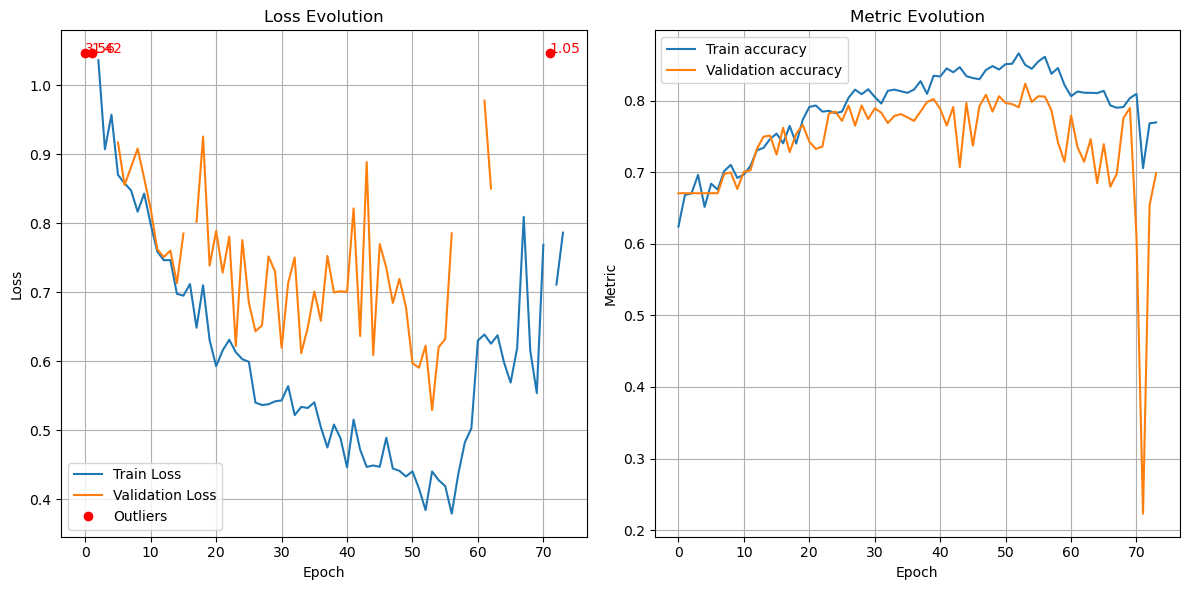

(<keras.engine.functional.Functional at 0x150ce73c160>,
 <keras.callbacks.History at 0x150ce73cfa0>)

In [7]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
    lambda: get_basic_model(
        HEIGHT,
        WIDTH,
        num_classes,
        metrics=METRICS),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    train_dataset=balanced_train_dataset,
    steps_per_epoch=resampled_steps_per_epoch,
    stopping_patience=20)